In [1]:
import numpy as np 
import gym
from gym import spaces
import random as rd

import matplotlib.pyplot as plt
from envs.NetworkOperatorEnv import NetworkOperatorEnv

In [4]:
def eps_greedy(Q, s, eps=0.1):
    '''
    Epsilon greedy policy
    '''
    if np.random.uniform(0,1) < eps:
        # Choose a random action
        return np.random.randint(Q.shape[1])
    else:
        # Choose the action of a greedy policy
        return greedy(Q, s)


def greedy(Q, s):
    '''
    Greedy policy
    return the index corresponding to the maximum action-state value
    '''
    return np.argmax(Q[s])

def Q_learning(env, lr=0.01, num_episodes=10000, eps=0.3, gamma=0.95, eps_decay=0.00005):
    nA = env.action_space.n
    nS = env.observation_space.n
    
    
    ind_ep =  []
    costs =  []

    # Initialize the Q matrix
    # Q: matrix nS*nA where each row represent a state and each colums represent a different action
    Q = np.zeros((nS, nA))
    games_reward = []
    test_rewards = []

    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0

        # decay the epsilon value until it reaches the threshold of 0.01
        if eps > 0.01:
            eps -= eps_decay


        action = eps_greedy(Q, state, eps) 
        
        next_state, rew, done, _ = env.step(action) # Take one step in the environment
    
        # choose the next action (needed for the SARSA update)
        next_action = eps_greedy(Q, next_state, eps) 
        # Q Learning update
        Q[state][action] = Q[state][action] + lr*(rew + gamma*np.max(Q[next_state]) - Q[state][action])

        state = next_state
        action = next_action
        tot_rew += rew
        #if done:
        games_reward.append(tot_rew)
        
        if (ep % 200) == 0:
            print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, tot_rew))
            ind_ep.append(ep)
            costs.append(tot_rew)
    
    print(Q)
    plt.plot(ind_ep, costs)
    #plt.xlim(4000, 5000)
    plt.title('Cout en fonction du nombre d\' itération' )
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Cout')
    plt.grid('on')
    #plt.rcParams["figure.figsize"] = [16, 9]
    plt.show()  
    
    
        # Test the policy every 300 episodes and print the results
   #     if (ep % 300) == 0:
   #         test_rew = run_episodes(env, Q, 1000)
   #         print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, test_rew))
   #         test_rewards.append(test_rew)

    #return Q

Episode:    0  Eps:0.3990  Rew:13.0000
Episode:  200  Eps:0.1990  Rew:39.0000
Episode:  400  Eps:0.0100  Rew:43.0000
Episode:  600  Eps:0.0100  Rew:41.0000
Episode:  800  Eps:0.0100  Rew:42.0000
Episode: 1000  Eps:0.0100  Rew:41.0000
Episode: 1200  Eps:0.0100  Rew:26.0000
Episode: 1400  Eps:0.0100  Rew:25.0000
Episode: 1600  Eps:0.0100  Rew:32.0000
Episode: 1800  Eps:0.0100  Rew:34.0000
Episode: 2000  Eps:0.0100  Rew:47.0000
Episode: 2200  Eps:0.0100  Rew:44.0000
Episode: 2400  Eps:0.0100  Rew:27.0000
Episode: 2600  Eps:0.0100  Rew:19.0000
Episode: 2800  Eps:0.0100  Rew:24.0000
Episode: 3000  Eps:0.0100  Rew:30.0000
Episode: 3200  Eps:0.0100  Rew:16.0000
Episode: 3400  Eps:0.0100  Rew:35.0000
Episode: 3600  Eps:0.0100  Rew:42.0000
Episode: 3800  Eps:0.0100  Rew:18.0000
Episode: 4000  Eps:0.0100  Rew:31.0000
Episode: 4200  Eps:0.0100  Rew:34.0000
Episode: 4400  Eps:0.0100  Rew:32.0000
Episode: 4600  Eps:0.0100  Rew:23.0000
Episode: 4800  Eps:0.0100  Rew:28.0000
Episode: 5000  Eps:0.0100

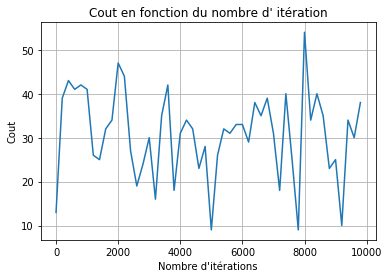

In [5]:
env = NetworkOperatorEnv(3, 30)
Q_learning(env, lr=.1, num_episodes=10000, eps=0.4, gamma=0.95, eps_decay=0.001)